In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [36]:
np.random.seed(42)
num_cities = 10
G = nx.complete_graph(num_cities)

In [37]:
pheromones = {(min(i, j), max(j, i)): 1.0 for i, j in G.edges}
distances = {(i, j): np.random.randint(1, 50) for i, j in G.edges}
costs = {(i, j): np.random.randint(1, 100) for i, j in G.edges}

In [38]:
num_ants = 5
alpha = 1.0
beta = 2.0
evaporation_rate = 0.5
max_iterations = 50

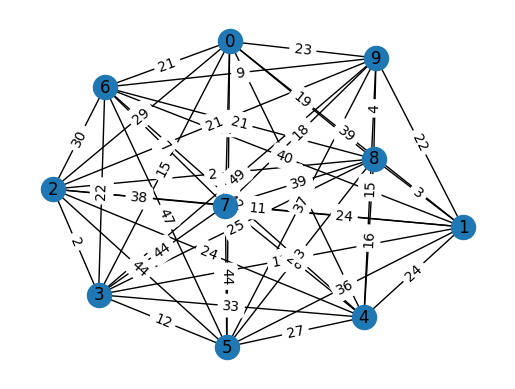

In [39]:
pos = nx.spring_layout(G)
fig, ax = plt.subplots()
nx.draw(G, pos, with_labels=True, ax=ax)
nx.draw_networkx_edge_labels(G, pos, edge_labels=distances, ax=ax)
plt.show()

In [40]:
data = {'Edge': list(distances.keys()),
        'Distance': list(distances.values()),
        'Cost': list(costs.values()),
        'Pheromone Level': list(pheromones.values())}

dataSet = pd.DataFrame(data)

print(dataSet)



      Edge  Distance  Cost  Pheromone Level
0   (0, 1)        39    89              1.0
1   (0, 2)        29    60              1.0
2   (0, 3)        15    14              1.0
3   (0, 4)        43     9              1.0
4   (0, 5)         8    90              1.0
5   (0, 6)        21    53              1.0
6   (0, 7)        39     2              1.0
7   (0, 8)        19    84              1.0
8   (0, 9)        23    92              1.0
9   (1, 2)        11    60              1.0
10  (1, 3)        11    71              1.0
11  (1, 4)        24    44              1.0
12  (1, 5)        36     8              1.0
13  (1, 6)        40    47              1.0
14  (1, 7)        24    35              1.0
15  (1, 8)         3    78              1.0
16  (1, 9)        22    81              1.0
17  (2, 3)         2    36              1.0
18  (2, 4)        24    50              1.0
19  (2, 5)        44     4              1.0
20  (2, 6)        30     2              1.0
21  (2, 7)        38     6      

In [41]:
pheromones

{(0, 1): 1.0,
 (0, 2): 1.0,
 (0, 3): 1.0,
 (0, 4): 1.0,
 (0, 5): 1.0,
 (0, 6): 1.0,
 (0, 7): 1.0,
 (0, 8): 1.0,
 (0, 9): 1.0,
 (1, 2): 1.0,
 (1, 3): 1.0,
 (1, 4): 1.0,
 (1, 5): 1.0,
 (1, 6): 1.0,
 (1, 7): 1.0,
 (1, 8): 1.0,
 (1, 9): 1.0,
 (2, 3): 1.0,
 (2, 4): 1.0,
 (2, 5): 1.0,
 (2, 6): 1.0,
 (2, 7): 1.0,
 (2, 8): 1.0,
 (2, 9): 1.0,
 (3, 4): 1.0,
 (3, 5): 1.0,
 (3, 6): 1.0,
 (3, 7): 1.0,
 (3, 8): 1.0,
 (3, 9): 1.0,
 (4, 5): 1.0,
 (4, 6): 1.0,
 (4, 7): 1.0,
 (4, 8): 1.0,
 (4, 9): 1.0,
 (5, 6): 1.0,
 (5, 7): 1.0,
 (5, 8): 1.0,
 (5, 9): 1.0,
 (6, 7): 1.0,
 (6, 8): 1.0,
 (6, 9): 1.0,
 (7, 8): 1.0,
 (7, 9): 1.0,
 (8, 9): 1.0}

In [42]:
def update_pheromones(G, pheromones, ant_paths, evaporation_rate):
    for edge in G.edges:
        pheromones[edge] *= (1 - evaporation_rate)
        for ant, path in ant_paths.items():
            if edge in zip(path, path[1:]):
                pheromones[edge] += 1

In [43]:
pheromone_data = pd.DataFrame(index = G.edges, columns = range(num_ants))
pheromone_data.fillna(1.0, inplace = True)
pheromone_data

0    1    2    3    4
0 1  1.0  1.0  1.0  1.0  1.0
  2  1.0  1.0  1.0  1.0  1.0
  3  1.0  1.0  1.0  1.0  1.0
  4  1.0  1.0  1.0  1.0  1.0
  5  1.0  1.0  1.0  1.0  1.0
  6  1.0  1.0  1.0  1.0  1.0
  7  1.0  1.0  1.0  1.0  1.0
  8  1.0  1.0  1.0  1.0  1.0
  9  1.0  1.0  1.0  1.0  1.0
1 2  1.0  1.0  1.0  1.0  1.0
  3  1.0  1.0  1.0  1.0  1.0
  4  1.0  1.0  1.0  1.0  1.0
  5  1.0  1.0  1.0  1.0  1.0
  6  1.0  1.0  1.0  1.0  1.0
  7  1.0  1.0  1.0  1.0  1.0
  8  1.0  1.0  1.0  1.0  1.0
  9  1.0  1.0  1.0  1.0  1.0
2 3  1.0  1.0  1.0  1.0  1.0
  4  1.0  1.0  1.0  1.0  1.0
  5  1.0  1.0  1.0  1.0  1.0
  6  1.0  1.0  1.0  1.0  1.0
  7  1.0  1.0  1.0  1.0  1.0
  8  1.0  1.0  1.0  1.0  1.0
  9  1.0  1.0  1.0  1.0  1.0
3 4  1.0  1.0  1.0  1.0  1.0
  5  1.0  1.0  1.0  1.0  1.0
  6  1.0  1.0  1.0  1.0  1.0
  7  1.0  1.0  1.0  1.0  1.0
  8  1.0  1.0  1.0  1.0  1.0
  9  1.0  1.0  1.0  1.0  1.0
4 5  1.0  1.0  1.0  1.0  1.0
  6  1.0  1.0  1.0  1.0  1.0
  7  1.0  1.0  1.0  1.0  1.0
  8  1.0  1.0  1.0  1.0  1.0
  9  1.0  1.0  1.0  1.0  1.0
5 6  1.0  1.0  1.0  1.0  1.0
  7  1.0  1.0  1.0  1.0  1.0
  8  1.0  1.0  1.0  1.0  1.0
  9  1.0  1.0  1.0  1.0  1.0
6 7  1.0  1.0  1.0  1.0  1.0
  8  1.0  1.0  1.0  1.0  1.0
  9  1.0  1.0  1.0  1.0  1.0
7 8  1.0  1.0  1.0  1.0  1.0
  9  1.0  1.0  1.0  1.0  1.0
8 9  1.0  1.0  1.0  1.0  1.0

In [44]:
def generate_ant_paths(G, num_ants, num_cities, alpha, beta, distances, costs):
    ant_paths = {}
    
    for ant in range(num_ants):
        remaining_nodes = set(G.nodes)
        current_node = np.random.choice(list(remaining_nodes))
        path = [current_node]
        remaining_nodes.remove(current_node)
        visited_nodes = set([current_node])
        
        while remaining_nodes:
            neighbors = list(set(G.neighbors(current_node)) - visited_nodes)
            
            if not neighbors:
                # If all neighbors are visited, go back to a previously visited node
                neighbors = list(visited_nodes)

            edges = [tuple(sorted((current_node, neighbor))) for neighbor in neighbors]
            pheromone_values = [pheromones.get(edge, 0) for edge in edges]
            heuristic_values = [
                    (pheromone_values[i] / distances.get(tuple(sorted((current_node, neighbor))), 1)) ** alpha +
                    (pheromone_values[i] / costs.get(tuple(sorted((current_node, neighbor))), 1)) ** beta
                    for i, neighbor in enumerate(neighbors)
            ]
            
            probabilities = heuristic_values / np.sum(heuristic_values)
            next_node = np.random.choice(neighbors, p = probabilities)
            
            path.append(next_node)
            remaining_nodes.discard(next_node)
            visited_nodes.add(next_node)
            current_node = next_node
            
        ant_paths[ant] = path
    return ant_paths

In [45]:
current_node = np.random.choice(list(G.nodes))
neighbors = list(G.neighbors(current_node))

edges = [tuple(sorted((current_node, neighbor))) for neighbor in neighbors]

pheromone_values = [pheromones.get(edge, 0) for edge in edges]



    
pheromone_values


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [46]:
def aco_algorithm(G, num_ants, num_cities, max_iterations, alpha, beta, evaporation_rate, distances, costs):
    best_path = None
    best_distance = float('inf')
    best_cost = float('inf')

    for iteration in range(max_iterations):
        ant_paths = generate_ant_paths(G, num_ants, num_cities, alpha, beta, distances, costs)

        update_pheromones(G, pheromones, ant_paths, evaporation_rate)
        
        for ant, path in ant_paths.items():
            total_distance = 0
            total_cost = 0
        
            for node1, node2 in zip(path, path[1:]):
                
                distance = distances.get((node1, node2), distances.get((node2, node1), float('inf')))
                cost = costs.get((node1, node2), costs.get((node2, node1), float('inf')))
                total_distance += distance
                total_cost += cost
            
            if total_cost < best_cost:
                best_path = path
                best_distance = total_distance
                best_cost = total_cost
                
          # Print the path, distance, and cost for each ant
            print(f"Ant {ant} Path: {path}")
            print(f"Ant {ant} Distance: {total_distance}")
            print(f"Ant {ant} Cost: {total_cost}")
            print("------")

    return pheromones, best_path, best_distance, best_cost

In [47]:
best_pheromones, best_path, best_distance, best_cost = aco_algorithm(G, num_ants, num_cities, max_iterations, alpha, beta, evaporation_rate, distances, costs)


Ant 0 Path: [0, 2, 3, 4, 8, 5, 7, 6, 1, 9]
Ant 0 Distance: 196
Ant 0 Cost: 466
------
Ant 1 Path: [0, 7, 3, 2, 1, 8, 9, 5, 4, 6]
Ant 1 Distance: 209
Ant 1 Cost: 462
------
Ant 2 Path: [0, 5, 8, 9, 2, 3, 6, 4, 1, 7]
Ant 2 Distance: 150
Ant 2 Cost: 500
------
Ant 3 Path: [5, 8, 2, 3, 0, 7, 4, 6, 9, 1]
Ant 3 Distance: 162
Ant 3 Cost: 435
------
Ant 4 Path: [6, 9, 2, 3, 1, 8, 5, 7, 0, 4]
Ant 4 Distance: 175
Ant 4 Cost: 327
------
Ant 0 Path: [8, 5, 4, 1, 3, 2, 0, 7, 6, 9]
Ant 0 Distance: 151
Ant 0 Cost: 446
------
Ant 1 Path: [9, 8, 1, 4, 2, 3, 0, 7, 5, 6]
Ant 1 Distance: 202
Ant 1 Cost: 369
------
Ant 2 Path: [4, 3, 2, 8, 5, 0, 7, 6, 9, 1]
Ant 2 Distance: 125
Ant 2 Cost: 516
------
Ant 3 Path: [0, 7, 4, 8, 5, 3, 2, 9, 6, 1]
Ant 3 Distance: 170
Ant 3 Cost: 370
------
Ant 4 Path: [2, 3, 6, 0, 7, 1, 8, 9, 4, 5]
Ant 4 Distance: 157
Ant 4 Cost: 478
------
Ant 0 Path: [1, 8, 6, 9, 2, 3, 5, 0, 7, 4]
Ant 0 Distance: 143
Ant 0 Cost: 467
------
Ant 1 Path: [3, 2, 8, 1, 9, 6, 5, 0, 7, 4]
Ant 1 Dista

In [48]:
print("\nBest Path:", best_path)
print("Best Distance:", best_distance)
print("Best Cost:", best_cost)



Best Path: [5, 7, 0, 6, 9, 2, 3, 1, 8, 4]
Best Distance: 166
Best Cost: 313


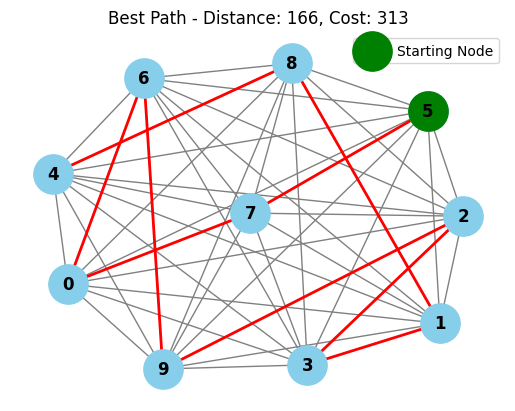

In [49]:
pos = nx.spring_layout(G)

fig, ax = plt.subplots()


nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, edge_color='gray', ax=ax)


for i in range(len(best_path) - 1):
    edge = (best_path[i], best_path[i + 1])
    nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color='red', width=2, ax=ax)



starting_node = best_path[0]
nx.draw_networkx_nodes(G, pos, nodelist=[starting_node], node_color='green', node_size=800, ax=ax, label="Starting Node")

plt.title(f"Best Path - Distance: {best_distance}, Cost: {best_cost}")

plt.legend()

plt.show()
